# Preliminary EDA

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
posts = pd.read_csv('data/clean_sports_posts.csv')

In [3]:
posts

,title,subreddit,score,created_utc,num_comments,age,has_authtext,has_linktext
0,Serena Williams’s Once-In-A-Lifetime Serve,sports,1,1.661814e+09,0,420116.161326,1,1
1,"Wholesome moment, ""Ichiro Girl"" throws out fir...",sports,1413,1.661797e+09,50,436886.161326,0,1
2,Williams' goodbye &amp; Raducanu's defence top...,sports,5,1.661797e+09,1,437390.161326,0,1
3,Duke volleyball player: BYU slow to act on slurs,sports,4962,1.661787e+09,703,447296.161326,1,1
4,[ESPN] Washington Commanders RB Brian Robinson...,sports,55,1.661743e+09,5,490948.161326,1,1
...,...,...,...,...,...,...,...,...
18473,First set of clubs,golf,2,1.661813e+09,6,422496.561974,0,1
18474,"Bought a used set of stealths off 2nd swing, o...",golf,77,1.661812e+09,20,423590.561974,0,1
18475,New Taylormade irons release?,golf,0,1.661812e+09,1,423744.561974,0,1
18476,How do you breath during your swing?,golf,4,1.661812e+09,20,423974.561974,0,0


### EDA

- DONE Distributions overall and by subreddit:
    - length of title
    - score
    - age
    - has_authtext
    - has_linktext
    - num_comments
- DONE Correlations among:
    - length of title
    - score
    - age
    - num_comments

#### Initialize Useful Variables

In [4]:
# create title length column
posts['title_len'] = [len(title) for title in posts.title]

In [5]:
# create subreddit list
subreddits = ['sports', 'nba', 'soccer', 'nfl', 'baseball',
              'collegebasketball', 'mma', 'formula1', 'running', 'hockey',
              'cfb', 'snowboarding', 'skiing', 'boxing', 'bicycling',
              'climbing', 'fishing', 'nascar', 'tennis', 'golf']

# create subreddit 5x4 array for convenient plotting
subreds_arr = np.array([subreddits[:4], subreddits[4:8], subreddits[8:12], subreddits[12:16], subreddits[16:20]])

In [6]:
# create list of numerical columns
numer_cols = ['title_len', 'score', 'age', 'has_authtext', 'has_linktext', 'num_comments']

#### Define Functions for Overall, By Subreddit Distributions

In [7]:
# function for overall distribution of column
def dist_col(col_name, xmax=None):
    if xmax == None:
        xmax = max(posts[col_name])
    
    fig, ax = plt.subplots()

    ax.hist(x=posts[col_name][posts[col_name] < xmax], bins=20)
    ax.set_title(f'{col_name.capitalize()}');

In [8]:
# function for distribution of col_name by subreddit
def dist_col_bysub(col_name, xmax=None):
    if xmax == None:
        xmax = max(posts[col_name])
    
    fig, axs = plt.subplots(5, 4, figsize=(25, 20))
    fig.subplots_adjust(hspace=.3)

    for i in range(subreds_arr.shape[0]):
        for j in range(subreds_arr.shape[1]):
            axs[i][j].hist(x=posts[posts[col_name] < xmax][posts[posts[col_name] < xmax].subreddit == subreds_arr[i][j]][col_name], bins=20)
            axs[i][j].set_title(f'{col_name.capitalize()} in {subreds_arr[i][j]}', fontsize=16);

#### Examine Distributions

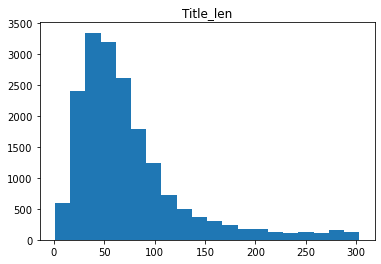

In [9]:
# overall title length distribution
dist_col('title_len')

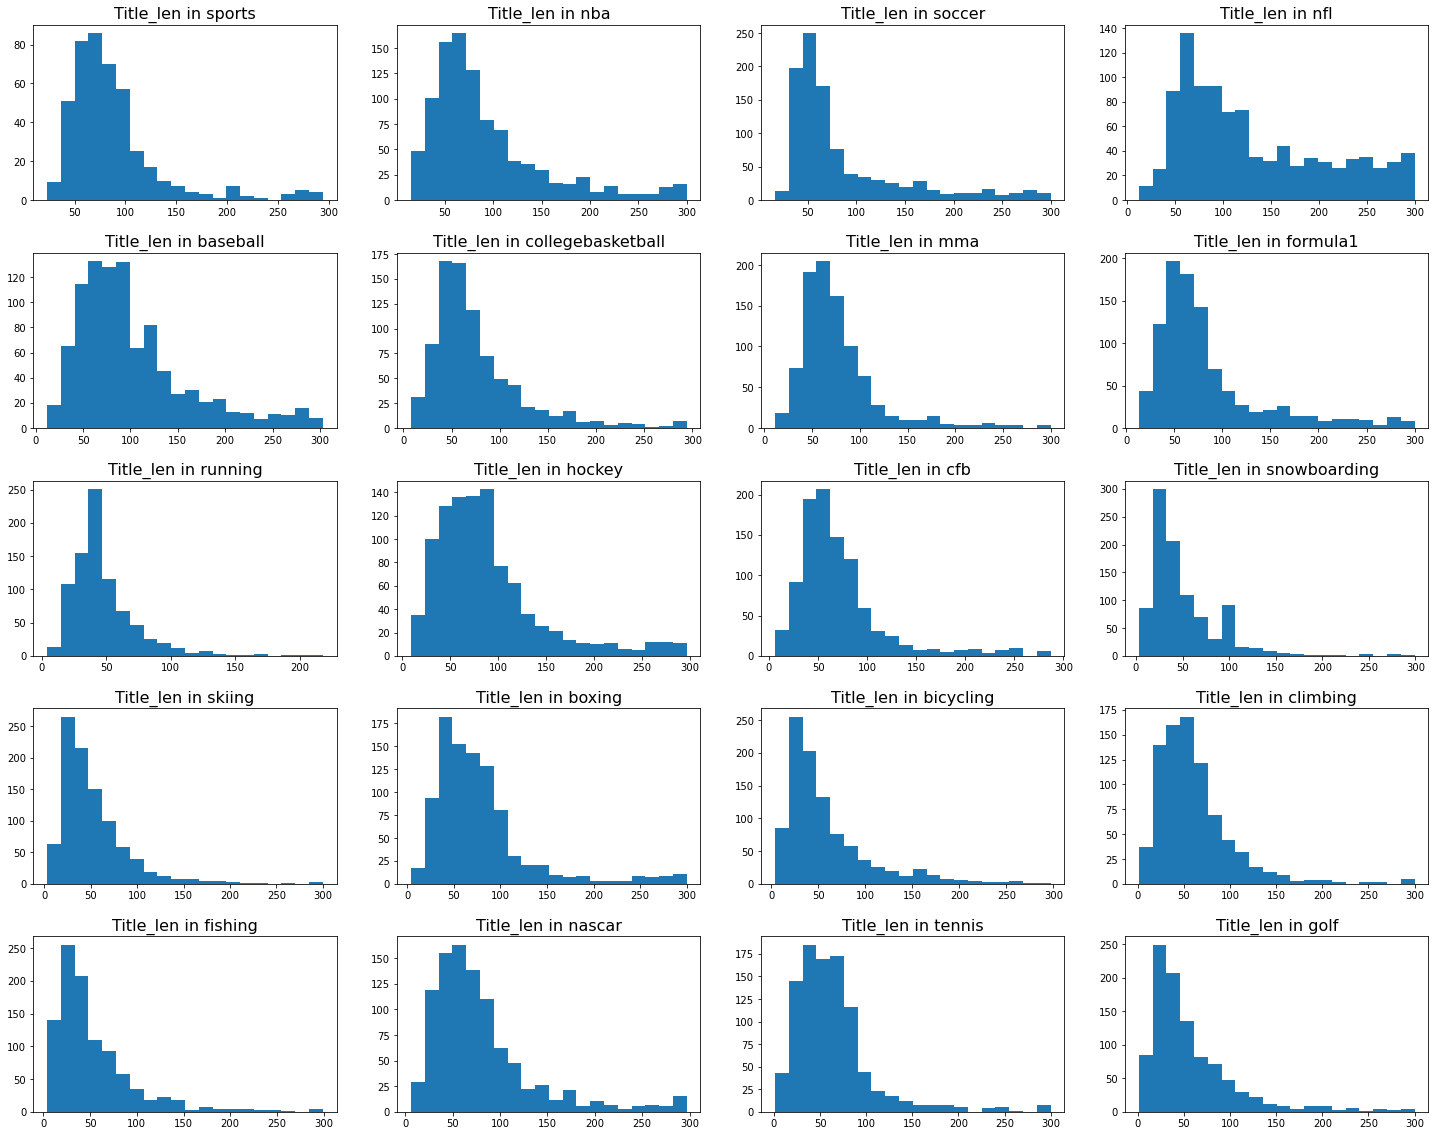

In [10]:
# title length by subreddit
dist_col_bysub('title_len')

The overall distribution of title lengths is centered around 50 characters and is right-skewed. Most subreddit title length distributions follow this overall pattern, though the four biggest sports in the U.S. (nba, nfl, baseball, and hockey) have somewhat more uniform distributions.

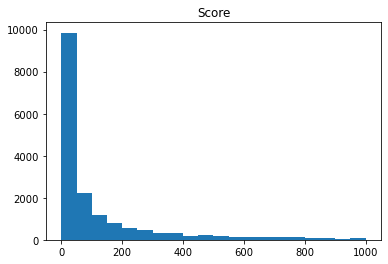

In [11]:
# overall score distribution
dist_col('score', xmax=1000)

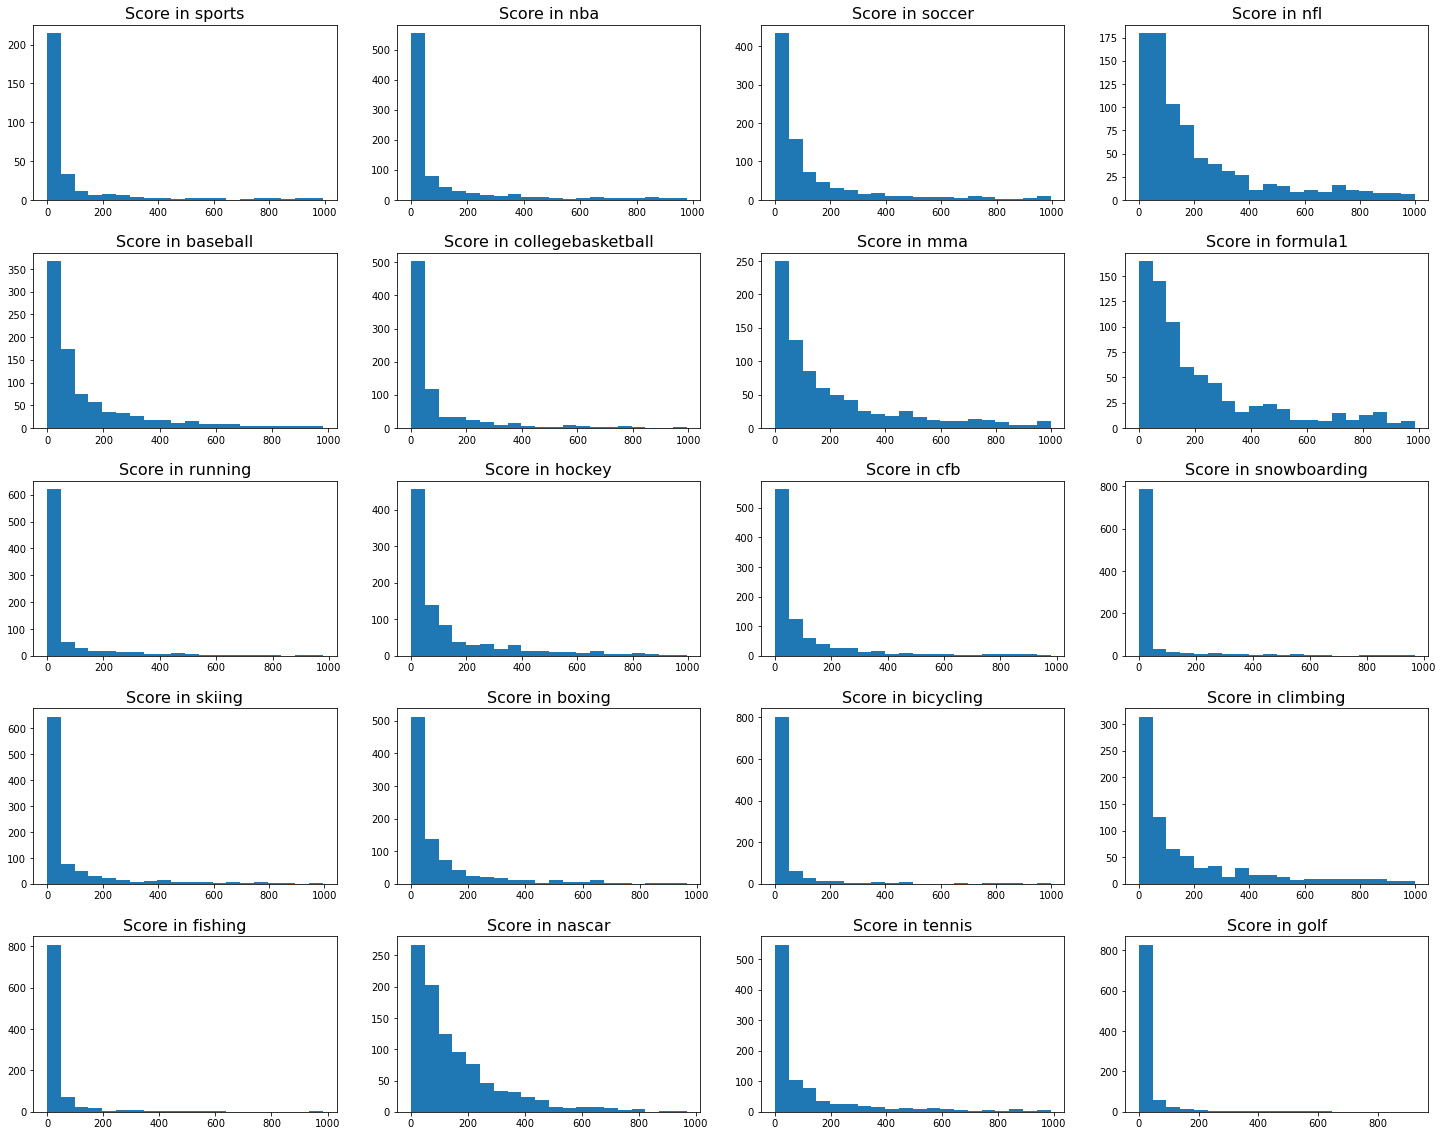

In [12]:
# score by subreddit
dist_col_bysub('score', xmax=1000)

- The overall distribution of scores is very dense below 50 and strongly right-skewed.
- Subreddit score distributions follow a similar pattern in general, though some are much more spread out on the low end, indicating a tendency for more descriptive titles.

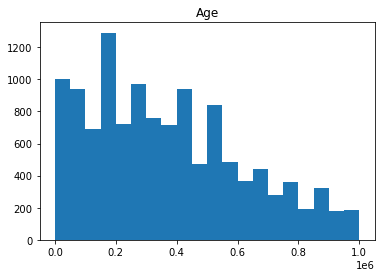

In [26]:
# overall age distribution
dist_col('age', xmax=1_000_000)

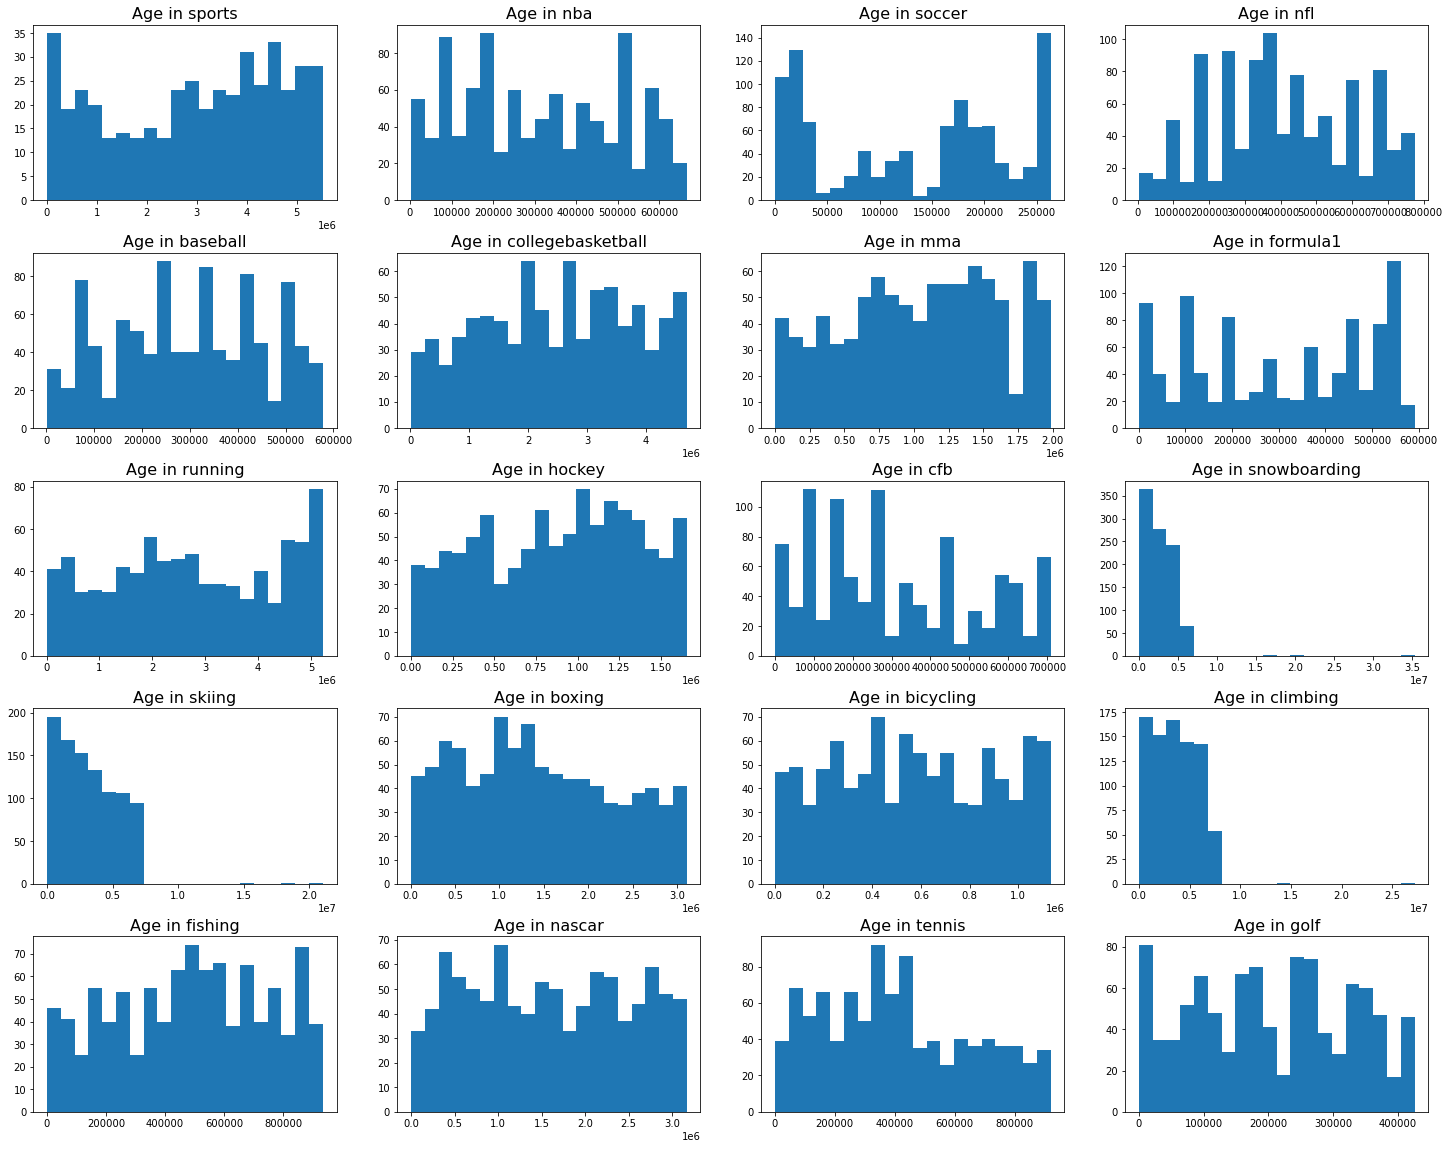

In [14]:
# age by subreddit
dist_col_bysub('age')

- More active subreddits such as soccer, collegebasketball, mma, and golf exhibit periodic behavior in post age, most likely according to time of day.
- Subreddits for sports that have been out of season recently or that might be centered around a few large competitions, such as snowboarding, skiing, and climbing, have much more sporadic posting behavior, while sports that are in-season and that don't focus on a few large events have more consistent posting frequencies.
- Subreddits for sports that are less focused on competition and are common personal hobbies, such as running, bicycling, and fishing, have the most consistent posting frequencies.

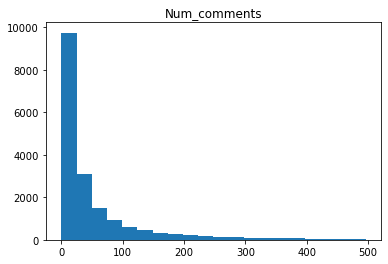

In [15]:
# overall num_comments distribution
dist_col('num_comments', xmax=500)

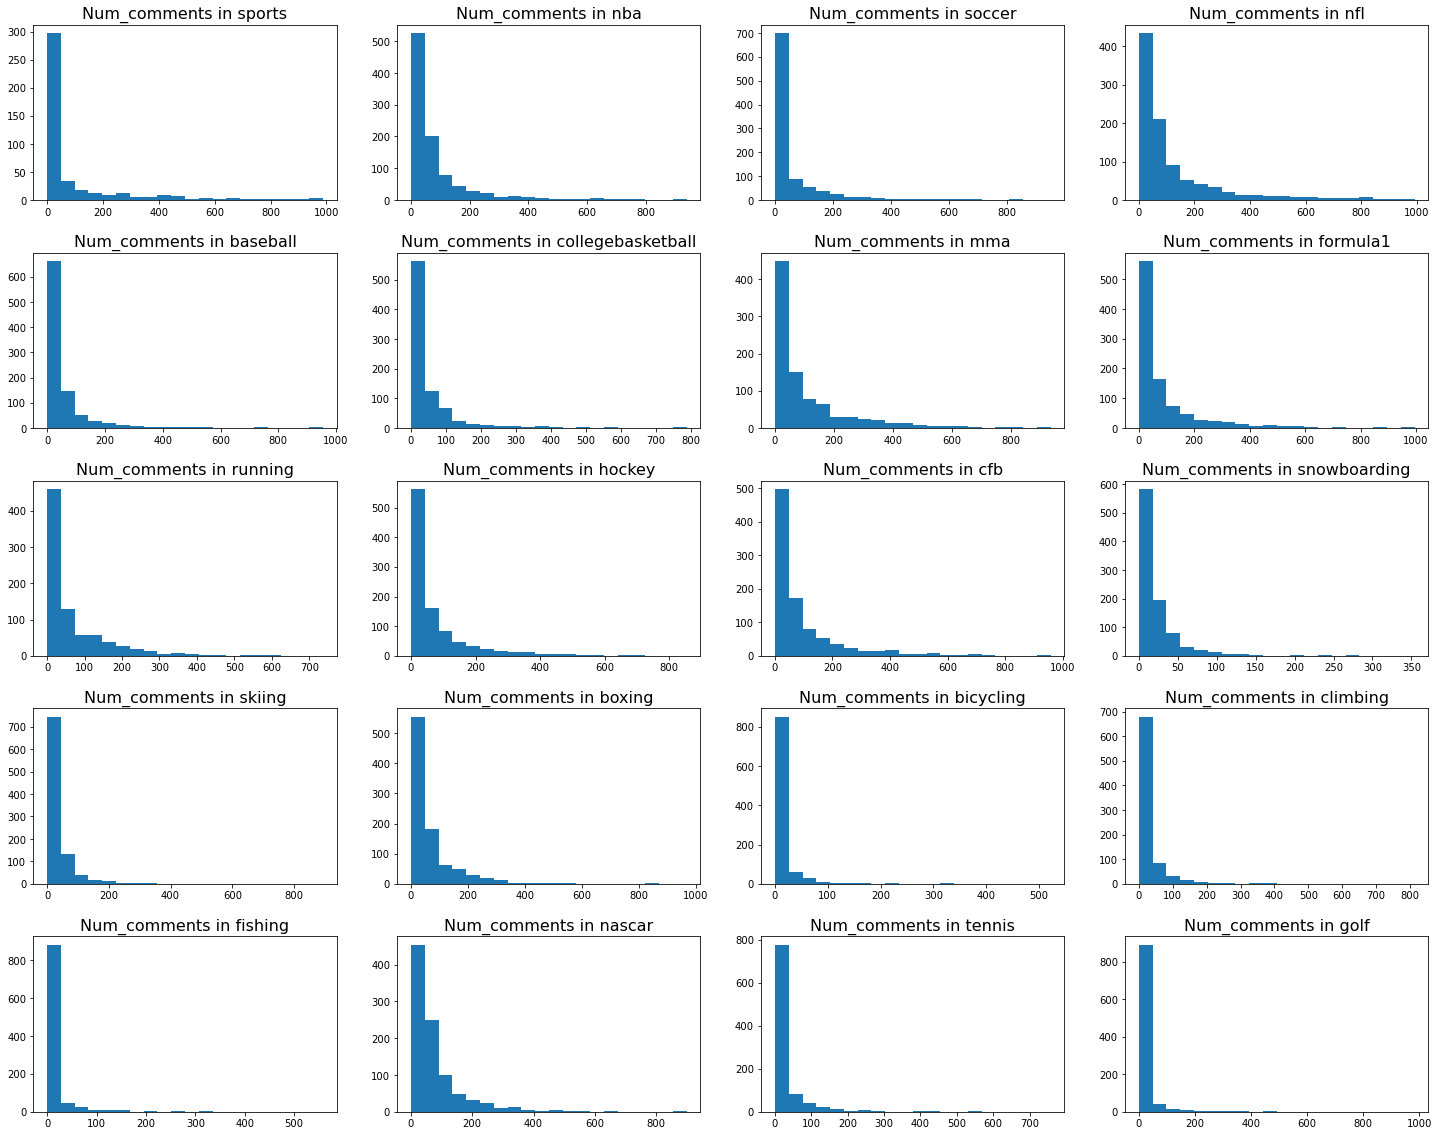

In [16]:
# num_comments by subreddit
dist_col_bysub('num_comments', xmax=1000)

- The overall distribution of num_comments is right-skewed, as is each subreddit distribution.
- Certain subreddits generate many fewer comments than average, such as bicycling, fishing, and golf. See means by subreddit, below:

In [17]:
posts.groupby('subreddit').num_comments.mean()

subreddit
baseball              63.226042
bicycling             15.776289
boxing                99.860963
cfb                  244.310275
climbing              31.868990
collegebasketball     51.810778
fishing               15.324242
formula1             144.248731
golf                  30.630940
hockey                85.326284
mma                  199.375948
nascar               167.354037
nba                  102.912821
nfl                  146.862069
running               73.580144
skiing                34.726799
snowboarding          23.562893
soccer                95.870707
sports               140.011261
tennis                74.371017
Name: num_comments, dtype: float64

- Subreddits with the fewest comments tend to be more hobby-oriented, such as bicycling and fishing, or are perhaps just out of season, like skiing and snowboarding.
- There might also be overlapping effects here, as for skiing and snowboarding, which are both a bit more hobby-oriented and out of season.

In [18]:
# overall proportion of posts with author text
posts.has_authtext.mean()

0.4376555904318649

In [19]:
# author text proportion by subreddit
posts.groupby('subreddit').has_authtext.mean()

subreddit
baseball             0.861458
bicycling            0.057732
boxing               0.207487
cfb                  0.896236
climbing             0.000000
collegebasketball    0.710180
fishing              0.025253
formula1             0.853807
golf                 0.089990
hockey               0.635448
mma                  0.479957
nascar               0.786749
nba                  0.644103
nfl                  0.744422
running              0.003589
skiing               0.126173
snowboarding         0.051363
soccer               0.939394
sports               0.144144
tennis               0.224049
Name: has_authtext, dtype: float64

In [20]:
# overall proportion of posts with link text
posts.has_linktext.mean()

0.5082259984846845

In [21]:
# link text proportion by subreddit
posts.groupby('subreddit').has_linktext.mean()

subreddit
baseball             0.516667
bicycling            0.000000
boxing               0.005348
cfb                  0.936928
climbing             0.007212
collegebasketball    0.629940
fishing              0.514141
formula1             0.994924
golf                 0.392315
hockey               0.333333
mma                  0.795233
nascar               0.070393
nba                  0.155897
nfl                  0.375254
running              1.000000
skiing               0.313869
snowboarding         0.379455
soccer               1.000000
sports               1.000000
tennis               0.998972
Name: has_linktext, dtype: float64

- The presence of author and link text vary widely across subreddits. This is likely the result of variation in both subreddit member tendencies and subreddit administration. 
- Correlation between subreddit popularity and member tendencies / administration might compromise usefulness of has_authtext and has_linktext in analysis.

#### Examine Correlations

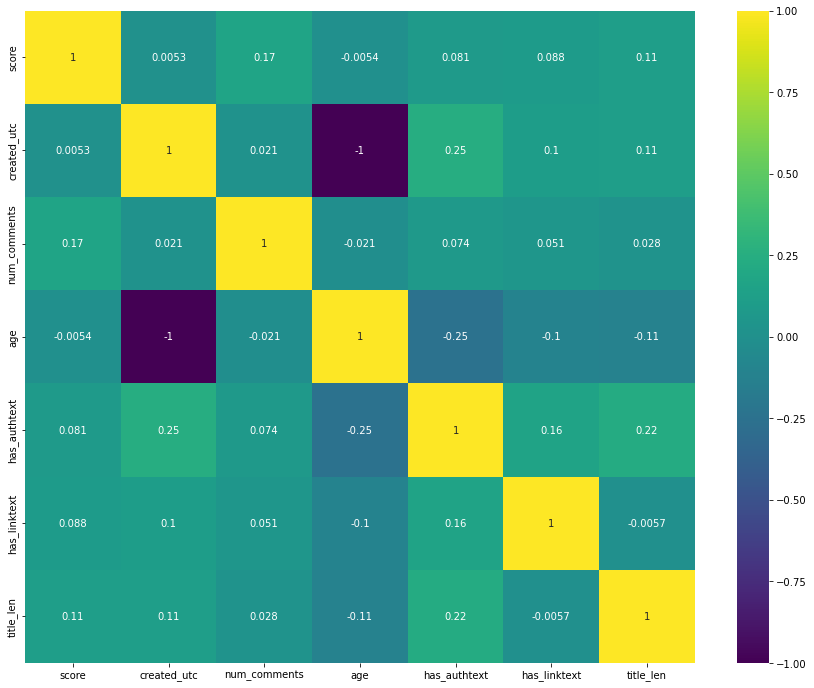

In [22]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(posts.corr(), annot=True, vmin=-1, cmap='viridis');

- There is relatively little correlation among variables (except between those which are perfectly correlated by construction).
- Age correlations with has_authtext and has_linktext are not likely to be meaningful, since these text features are connected to author and subreddit rather than possibly varying over time, as with score and num_comments.
- Near-zero correlation between age and num_comments is noteworthy:
    - Posts that have been up for longer do not tend to get more comments.
    - This suggests that the content of a post will be by far most predictive of engagement.
- Num_comments is weakly correlated with score (though this is one of the strongest correlations in the data), which has two possible explanations:
    - Users tend to comment on posts regardless of whether they think the post is particularly good or bad.
    - Users tend to comment primarily on good posts and bad posts rather than average posts, a sort of polarized commenting self-selection bias.
- Title length does not appear to be useful in explaining num_comments, though it is weakly correlated with score.

In [23]:
posts

,title,subreddit,score,created_utc,num_comments,age,has_authtext,has_linktext,title_len
0,Serena Williams’s Once-In-A-Lifetime Serve,sports,1,1.661814e+09,0,420116.161326,1,1,42
1,"Wholesome moment, ""Ichiro Girl"" throws out fir...",sports,1413,1.661797e+09,50,436886.161326,0,1,98
2,Williams' goodbye &amp; Raducanu's defence top...,sports,5,1.661797e+09,1,437390.161326,0,1,59
3,Duke volleyball player: BYU slow to act on slurs,sports,4962,1.661787e+09,703,447296.161326,1,1,48
4,[ESPN] Washington Commanders RB Brian Robinson...,sports,55,1.661743e+09,5,490948.161326,1,1,139
...,...,...,...,...,...,...,...,...,...
18473,First set of clubs,golf,2,1.661813e+09,6,422496.561974,0,1,18
18474,"Bought a used set of stealths off 2nd swing, o...",golf,77,1.661812e+09,20,423590.561974,0,1,114
18475,New Taylormade irons release?,golf,0,1.661812e+09,1,423744.561974,0,1,29
18476,How do you breath during your swing?,golf,4,1.661812e+09,20,423974.561974,0,0,36


In [24]:
# re-order columns for readability
posts = posts[['title', 'title_len', 'subreddit', 'score', 'created_utc', 'age', 'has_authtext', 'has_linktext', 'num_comments']]

In [25]:
# save
posts.to_csv('data/cl_aug_sports_posts.csv', index=False)